In [1]:
%matplotlib inline
import pandas as pd
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib.gridspec import GridSpec
import matplotlib.patches as patches

In [2]:
# keys = plt.rcParams.keys()
# print(keys)
# 'font.sans-serif': "Verdana",

custom_style = {
    'figure.figsize': (8, 6),
    'font.family':'sans-serif',
    'axes.facecolor': 'white',
    'figure.facecolor':'lightgray',
    'scatter.marker': 'o',
    'font.size': 9,
    'axes.grid': True
    }

### Importação de múltiplos arquivos a partir de um mesmo diretório 

In [3]:
directory_path = 'Poços_Marinho'

In [4]:
csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]
#len(csv_files)
#csv_files

In [5]:
dataframes = []

for csv_file in csv_files:
    file_path = os.path.join(directory_path, csv_file)
    df = pd.read_csv(file_path)
    dataframes.append(df)


#### Cálculo sobre uma coluna dos arquivos importados

In [6]:
dataframes = []
media=[]
for csv_file in csv_files:
    file_path = os.path.join(directory_path, csv_file)
    df = pd.read_csv(file_path)
    avg = df["COT"].mean()
    media.append(avg)
#media
    


In [7]:
pasta = 'Outputs_Planilhas'
csv_files = [file for file in os.listdir(pasta) if file.endswith('.csv')]
dataframes = []
Tr_media=[]
for csv_file in csv_files:
    file_path = os.path.join(pasta, csv_file)
    df = pd.read_csv(file_path)
    avg = df["Tr_IH_Log"].mean()
    Tr_media.append(avg)
len(Tr_media)

70

In [8]:

Tr_Ro_med=[]
for csv_file in csv_files:
    file_path = os.path.join(pasta, csv_file)
    df = pd.read_csv(file_path)
    avg = df["Tr_Ro_Log"].mean()
    Tr_Ro_med.append(avg)
len(Tr_Ro_med)

70

#### Gráficos comparando colunas e valores calculados dos arquivos importados

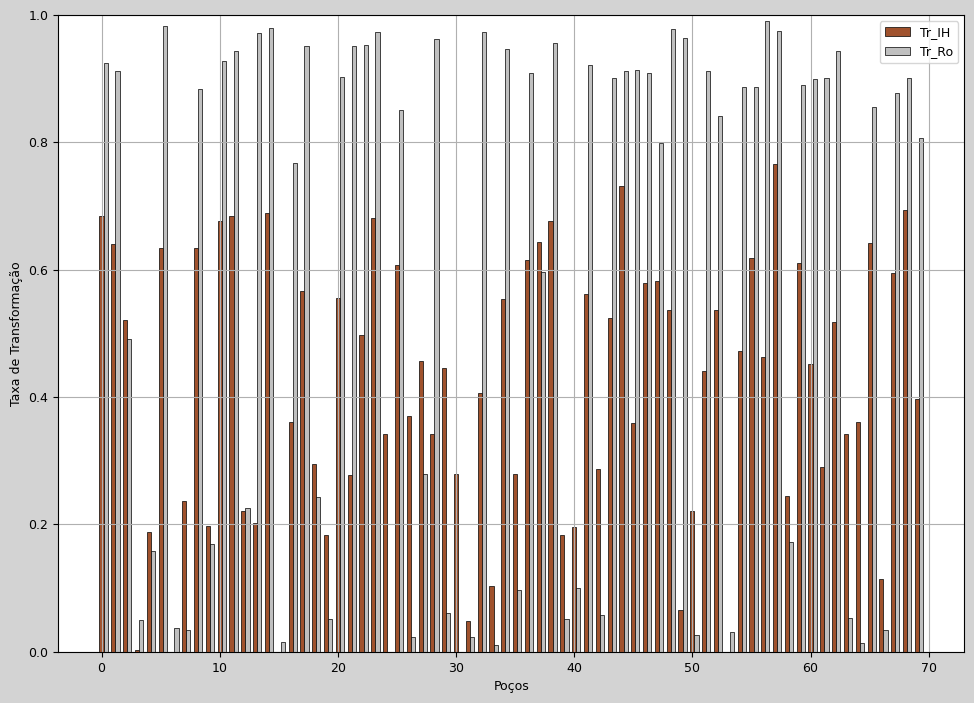

In [16]:
#%matplotlib
a4_height = 8.27  # inches
a4_width = 11.69  # inches

fig, ax=plt.subplots(figsize=(a4_width, a4_height))
x=np.arange(70)
largura = 0.35

ax1=ax.bar(x,Tr_media, largura, label="Tr_IH",facecolor="sienna", edgecolor="black", linewidth=0.5)
ax2=ax.bar(x+largura,Tr_Ro_med, largura, label="Tr_Ro",facecolor="silver", edgecolor="black", linewidth=0.5)
plt.ylim(0,1.0)
ax.set_ylabel("Taxa de Transformação")
ax.set_xlabel("Poços")
ax.legend()
plt.style.use(custom_style)
plt.ylim(0,1.0)


plt.savefig("Tr_IHxRo.pdf")

In [10]:
pasta = 'Outputs_Planilhas'
csv_files = [file for file in os.listdir(pasta) if file.endswith('.csv')]
dataframes = []
Tr_dif=[]
for csv_file in csv_files:
    file_path = os.path.join(pasta, csv_file)
    df = pd.read_csv(file_path)
    df["euclid"] = np.sqrt((df["Tr_IH_Log"]-df["Tr_Ro_Log"])**2)
    med=df["euclid"].mean()
    Tr_dif.append(med)
#Tr_dif

(0.0, 1.0)

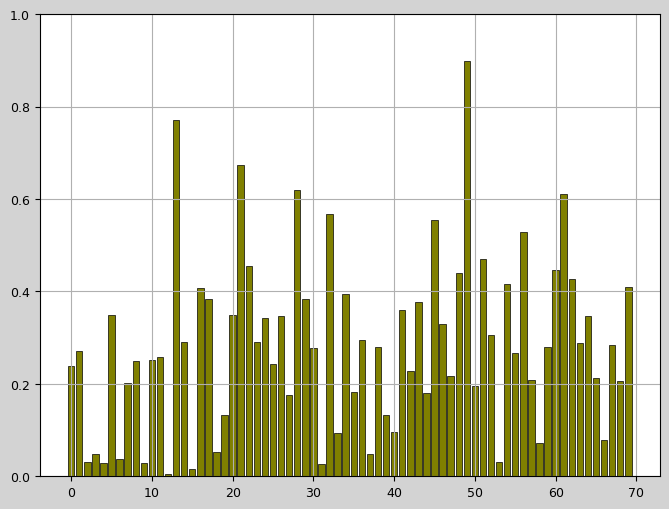

In [11]:
#%matplotlib
x=np.arange(70)
plt.bar(x,Tr_dif, facecolor="olive", edgecolor="black", linewidth=0.5)
plt.ylim(0,1.0)

(0.0, 1.0)

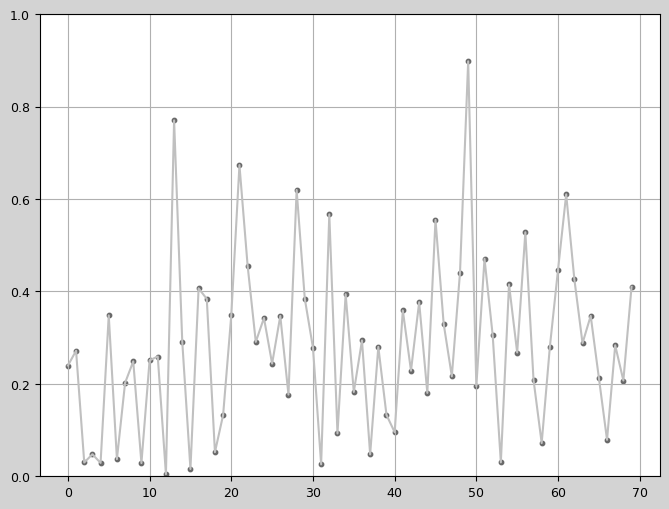

In [12]:
#%matplotlib
x=np.arange(70)
plt.scatter(x,Tr_dif, color="dimgray", s=10)
plt.plot(x, Tr_dif, color="silver")
plt.ylim(0,1.0)

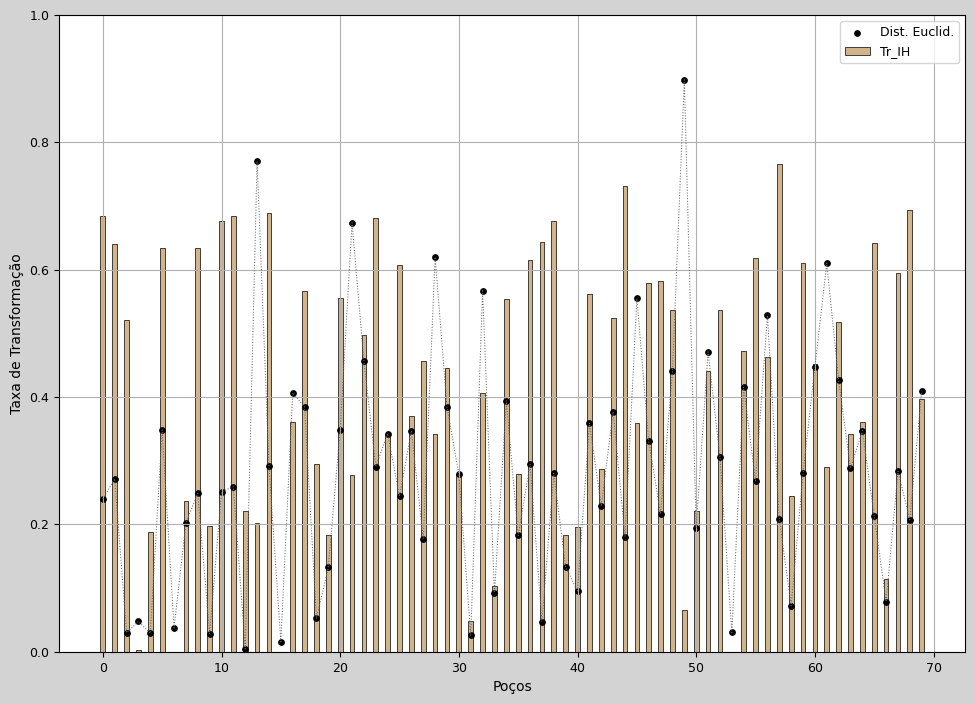

In [17]:
#%matplotlib
# tamahnho A4 (paisagem)
a4_height = 8.27  # inches
a4_width = 11.69  # inches

fig, ax=plt.subplots(figsize=(a4_width, a4_height))
x=np.arange(70)
largura = 0.4

ax1=ax.bar(x,Tr_media, largura, label="Tr_IH",facecolor="tan", edgecolor="black", linewidth=0.5)
ax2=ax.scatter(x,Tr_dif, color="black", label="Dist. Euclid.",s=15)
ax3=ax.plot(x, Tr_dif, color="dimgray", linestyle=":", linewidth=0.75)
plt.ylim(0,1.0)
ax.set_ylabel("Taxa de Transformação", fontsize=10)
ax.set_xlabel("Poços", fontsize=10)
ax.legend()
plt.ylim(0,1.0)
plt.style.use(custom_style)

plt.savefig("Tr_Dist.Euc.pdf")


### Comparação entre grupos de arquivos importados de diferentes diretórios

In [14]:

pasta = 'Output_Achilles'
csv_files = [file for file in os.listdir(pasta) if file.endswith('.csv')]
dataframes1 = []
for csv_file in csv_files:
    file_path = os.path.join(pasta, csv_file)
    df = pd.read_csv(file_path)
    df2=df[["Profundidade","COT","S1","S2","S3","Tmax","IH","IO","Cluster"]]
    df2[["Ro (calculada)", "IH0a", "COT0","S2","IH0"]]=df[["R0 calculada [%]","IH0 Ativo [mg HC/g COT]","COT0 [%]","S20 [mg HC/g rocha]","IH0 [mg HC/g COT]"]]
    dataframes1.append(df1)
#dataframes

/tmp/ipykernel_4779/2341404274.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[["Ro (calculada)", "IH0a", "COT0","S2","IH0"]]=df[["R0 calculada [%]","IH0 Ativo [mg HC/g COT]","COT0 [%]","S20 [mg HC/g rocha]","IH0 [mg HC/g COT]"]]
/tmp/ipykernel_4779/2341404274.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[["Ro (calculada)", "IH0a", "COT0","S2","IH0"]]=df[["R0 calculada [%]","IH0 Ativo [mg HC/g COT]","COT0 [%]","S20 [mg HC/g rocha]","IH0 [mg HC/g COT]"]]
/tmp/ipykernel_4779/2341404274.py:8:

NameError: name 'df1' is not defined

In [ ]:
combined_df = pd.concat(dataframes1, ignore_index=True)
combined_df.dropna()

,Profundidade,COT,S1,S2,S3,Tmax,IH,IO,Cluster,Ro (calculada),IH0a,COT0,IH0
0,994.0,0.31,0.17,1.150231,0.36,422.0,270.97,116.13,3,0.436,999.000000,0.336680,341.639430
1,1024.0,1.95,0.40,7.925129,1.00,421.0,295.90,51.28,3,0.418,465.459174,2.135341,371.141126
2,1054.0,1.32,0.25,3.898587,0.71,423.0,214.39,53.79,3,0.454,464.211348,1.411898,276.123750
3,1084.0,2.50,0.23,10.168488,1.10,423.0,294.40,44.00,3,0.454,411.256789,2.741530,370.905581
4,1114.0,3.04,0.39,14.824813,1.27,422.0,351.97,41.78,3,0.436,459.299199,3.394734,436.700301
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,1954.0,2.34,0.47,13.475887,0.51,434.0,391.45,21.79,1,0.652,723.586548,2.711166,497.051298
236,1984.0,2.66,0.56,14.927947,0.58,434.0,380.83,21.80,1,0.652,638.747458,3.072623,485.837185
237,2014.0,2.78,0.48,17.078237,0.75,434.0,416.19,26.98,1,0.652,678.227886,3.253708,524.885293
238,2074.0,1.76,0.26,8.900083,0.55,432.0,341.48,31.25,1,0.616,876.200211,2.008547,443.110472


In [ ]:
pasta = 'Output_Stat'
csv_files = [file for file in os.listdir(pasta) if file.endswith('.csv')]
dataframes = []
for csv_file in csv_files:
    file_path = os.path.join(pasta, csv_file)
    df = pd.read_csv(file_path)
    dataframes.append(df)
#dataframes
combined_df1 = pd.concat(dataframes)
combined_df1.dropna()

,Unnamed: 0,Profundidade,COT,S1,S2,S3,Tmax,IH,IO,Cluster,COTa,IH0a,Querogênio,Tr_Ro_Log,Tr_IH_Log,COT0,S20,IH0
2,2,2891.0,2.72,0.43,11.47,1.18,424.0,421.69,43.38,1,1.62,568.84,Tipo II,0.038,-0.000,3.39,19.31,568.84
3,3,2947.0,3.79,4.38,34.00,1.23,424.0,897.10,32.45,1,2.69,961.06,Tipo I,0.038,-0.000,4.99,47.97,961.06
5,5,2978.0,1.47,0.38,4.21,1.76,431.0,286.39,119.73,1,0.37,659.93,Tipo II/III,0.039,-0.000,2.56,16.91,659.93
6,6,2984.0,2.79,0.35,15.39,1.95,433.0,551.61,69.89,1,1.69,696.46,Tipo II,0.039,-0.000,3.66,25.47,696.46
9,9,3111.0,2.18,0.24,10.11,0.31,434.0,463.76,14.22,1,1.08,666.74,Tipo II,0.040,-0.000,3.07,20.48,666.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,22,1954.0,2.34,0.47,9.16,0.51,434.0,391.45,21.79,0,1.49,515.92,Tipo II,0.983,0.317,2.79,14.40,515.92
23,23,1984.0,2.66,0.56,10.13,0.58,434.0,380.83,21.80,0,1.81,485.22,Tipo II,0.987,0.318,3.07,14.90,485.22
24,24,2014.0,2.78,0.48,11.57,0.75,434.0,416.19,26.98,0,1.93,518.00,Tipo II,0.990,0.319,3.22,16.67,518.00
25,25,2074.0,1.76,0.26,6.01,0.55,432.0,341.48,31.25,0,0.91,518.60,Tipo II,0.997,0.321,2.24,11.64,518.60


ValueError: x and y must be the same size

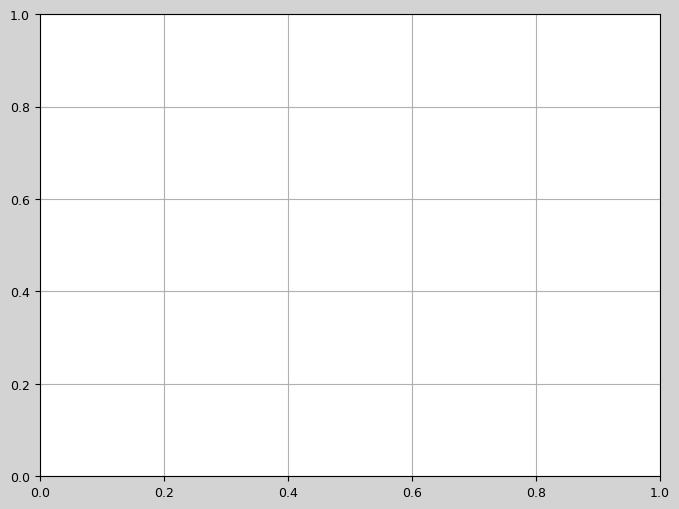

In [ ]:
plt.scatter(combined_df["IH0"],combined_df1["IH0"], c="dimgray", s=10, edgecolor="black", linewidth=0.5)
plt.xlim(0,1000)
plt.ylim(0,1000)
plt.xlabel("IH0 Achilles")
plt.ylabel("IH0 .ipynb")
plt.style.use(custom_style)
plt.show()